In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

#Dataset

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In [4]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

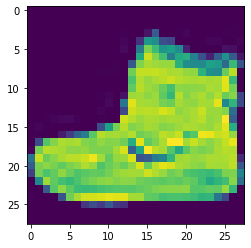

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

#Normalising

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

#Model

In [7]:
input_shape = (28, 28, 1)
num_classes=10

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3) ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3) ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(training_images, training_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4885 - accuracy: 0.8267
Epoch 2/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3512 - accuracy: 0.8753
Epoch 3/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3135 - accuracy: 0.8886
Epoch 4/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2894 - accuracy: 0.8963
Epoch 5/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2712 - accuracy: 0.9029
Epoch 6/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2563 - accuracy: 0.9085
Epoch 7/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2439 - accuracy: 0.9122
Epoch 8/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2317 - accuracy: 0.9161
Epoch 9/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2223 - accuracy: 0.9200
Epoch 10/25
1875/1875 [==============================] - 15s 8ms/step - l

In [12]:
metrics_test_loss, metrics_test_accuracy=model.evaluate(test_images, test_labels)
print(" Loss on test data is: " + str(metrics_test_loss))
print(" Accuracy of my nerual network on test data in percentage is : " + str(metrics_test_accuracy* 100))

313/313 [==============================] - 3s 8ms/step - loss: 0.4249 - accuracy: 0.8865
 Loss on test data is: 0.4248991310596466
 Accuracy of my nerual network on test data in percentage is : 88.65000009536743


Predicited class is : 2
My nerual network predicts the below image as : 2


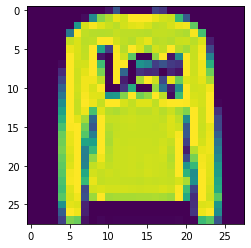

In [13]:
import numpy as np

# Predict


predictedResults = model.predict(test_images[1:2])

predictedclass = predictedResults.argmax()
print("Predicited class is : " + str(predictedclass))

print("My nerual network predicts the below image as : " + str(predictedclass))


plt.imshow(test_images[1])
plt.show()


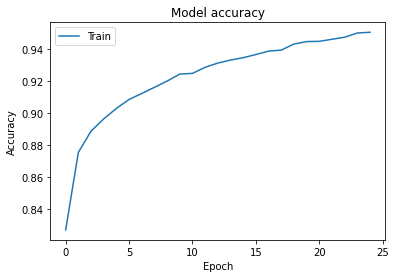

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

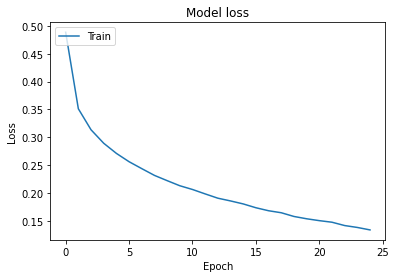

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()